In [4]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


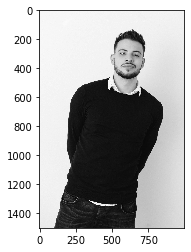

In [16]:
## datadir is the directory having two folder as "MALE" and "FEMALE" and save any 8-8 photos of both in these folder to run the below code. ANd change the path accordingly.


datadir = "C:/Users/lenovo/Desktop/ML Learn/Image-classification-male-female/"
categoies = ["MALE","FEMALE"]
for category in categoies:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img = cv2.imread(os.path.join(path,img),0)
        plt.imshow(img, cmap= "gray")
        break
    break

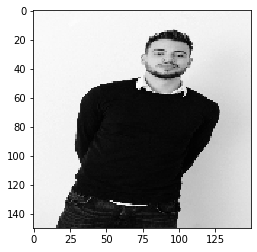

In [22]:
# Image resizing

image_size = 150
img_new= cv2.resize(img,(image_size,image_size))
plt.imshow(img_new, cmap= "gray")

In [48]:
training_data = []
def training_data_append():
    datadir = "C:/Users/lenovo/Desktop/ML Learn/Image-classification-male-female/"
    categoies = ["MALE","FEMALE"]
    
    for category in categoies:
        print(category)
        class_num = categoies.index(category)
        print(class_num)
        path = os.path.join(datadir,category)
        for img in os.listdir(path):
            img = cv2.imread(os.path.join(path,img),0)
            img_array = cv2.resize(img,(image_size,image_size))
            training_data.append([img_array,class_num])
            #print("dfdsf")
            
        
    

training_data_append()
    

MALE
0
FEMALE
1


In [49]:
print(len(training_data))

16


In [51]:
import random

random.shuffle(training_data)
#print(training_data)

for sample in training_data:
    print(sample[1])

1
1
0
1
1
0
0
1
1
1
0
0
0
0
0
1


In [52]:
x= []
y= []
for features, lables in training_data:
    x.append(features)
    y.append(lables)
x= np.array(x).reshape(-1,image_size,image_size,1)

In [53]:
y= np.array(y)
x= x/255.0


In [77]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(256, (3, 3), input_shape=x.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x, y, batch_size=32, epochs=10, validation_split=0.3)

Train on 11 samples, validate on 5 samples
Epoch 1/10
11/11 [==============================] - 5s 468ms/sample - loss: 0.6830 - accuracy: 0.6364 - val_loss: 9.8519 - val_accuracy: 0.2000
Epoch 2/10
11/11 [==============================] - 4s 353ms/sample - loss: 5.0046 - accuracy: 0.6364 - val_loss: 0.9757 - val_accuracy: 0.8000
Epoch 3/10
11/11 [==============================] - 4s 342ms/sample - loss: 2.7761 - accuracy: 0.3636 - val_loss: 0.8543 - val_accuracy: 0.2000
Epoch 4/10
11/11 [==============================] - 4s 346ms/sample - loss: 0.3880 - accuracy: 1.0000 - val_loss: 3.8140 - val_accuracy: 0.2000
Epoch 5/10
11/11 [==============================] - 4s 381ms/sample - loss: 1.9240 - accuracy: 0.6364 - val_loss: 1.6108 - val_accuracy: 0.2000
Epoch 6/10
11/11 [==============================] - 4s 366ms/sample - loss: 0.6642 - accuracy: 0.6364 - val_loss: 0.8210 - val_accuracy: 0.2000
Epoch 7/10
11/11 [==============================] - 4s 338ms/sample - loss: 0.4872 - accuracy

In [57]:
val_loss, val_accu = model.evaluate(x,y)
print(val_loss,val_accu)

16/16 [==============================] - 1s 76ms/sample - loss: 0.9805 - accuracy: 0.7500
0.9805360436439514 0.75


In [85]:
print(x.shape)

(16, 150, 150, 1)


In [89]:
prediction = model.predict(x)
print(prediction)

[[0.91942465]
 [0.7871647 ]
 [0.02572742]
 [0.98105055]
 [0.9497855 ]
 [0.23752125]
 [0.06030925]
 [0.9150195 ]
 [0.8184582 ]
 [0.9215318 ]
 [0.12075359]
 [0.8520639 ]
 [0.52513695]
 [0.80203027]
 [0.8578735 ]
 [0.69097877]]


In [90]:
#### Previous Prediction input shape


print(x.shape[1:])

(150, 150, 1)


women.jpg
(150, 150, 1)


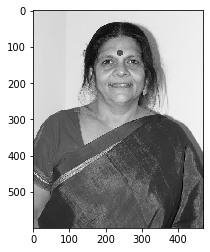

In [91]:
## The test ismage is from this link- "https://www.google.com/search?q=image+of+women&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi1wYjlxOjpAhUYOSsKHUlSCDwQ_AUoAXoECA8QAw&biw=1536&bih=754#imgrc=MUyZN2H9nR9VmM"
## save this image in your local machine with name "women"

image_size =150
def new_test(filename):
    print(filename)
    test_img= cv2.imread(filename,0)
    plt.imshow(test_img,cmap="gray")
    img_new= cv2.resize(test_img,(image_size,image_size))
    img_new= np.array(img_new).reshape(1,image_size,image_size,1)
    print(img_new.shape[1:])
    
new_test("women.jpg")
    
    

In [92]:
### Issue Area

prediction= model.predict(img_new)
print(prediction)

ValueError: Error when checking input: expected conv2d_7_input to have 4 dimensions, but got array with shape (150, 150)